In [1]:
from scipy.linalg import eigh
from scipy.sparse import diags
import numpy as np
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

np.set_printoptions(precision=3, suppress=True)

In [2]:
x = np.linspace(0, 1, 1001)
dx = x[1] - x[0]

In [7]:
# V = 1000 * np.concatenate([(np.cos(2 * np.pi * x) ** 2 - 1)[:500], 0.6 * (np.cos(2 * np.pi * x) ** 2 - 1)[500:]])
# V = 400 * (np.cos(np.pi * x) ** 2 - 1)
V = -800 * np.sin(np.pi * x) ** 2

In [8]:
q = np.pi/3

KE_particle = diags(
    [
        -1/dx**2 * np.ones(len(x)-1), 
        2/dx**2 * np.ones(len(x)), 
        -1/dx**2 * np.ones(len(x)-1)

    ], [-1, 0, 1])

KE_lattice = diags(q**2 * np.ones(len(x)), 0)

KE_cross = -2j * q * diags(
    [
        -1/(2*dx) * np.ones(len(x)-1), 
        1/(2*dx) * np.ones(len(x)-1)
    
    ], [-1, 1])

Hamiltonian = (KE_particle + KE_lattice + KE_cross + diags(V, 0)).todense()
Hamiltonian[0, -1] = Hamiltonian[-1, 0] = -1/dx**2

E, phi = eigh(Hamiltonian) # evals, evecs

In [9]:
print(np.real(E[:10]))

[-713.685 -546.49  -390.878 -248.411 -125.273  -12.571   56.22   216.266
  315.054  543.097]


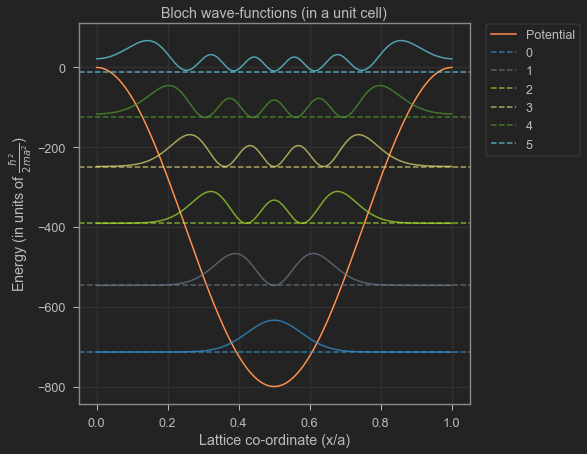

In [10]:
fig = plt.figure(figsize = (7, 7))
plt.plot(x, V, c = "C4", label = "Potential")

for i in range(np.argmax(E > 0)):
    prob = np.abs(phi[:, i])**2
    plt.plot(x, E[i] + 0.1 * np.max(-V)/np.max(prob) * prob, c = f"C{i + 12}", alpha = 0.7)
    plt.axhline(E[i], c = f"C{i + 12}", ls = "dashed", alpha = 0.7, label = f"{i}")

plt.legend(bbox_to_anchor=(1.025, 1.015))
plt.title("Bloch wave-functions (in a unit cell)")
plt.xlabel("Lattice co-ordinate (x/a)")
plt.ylabel(r"Energy (in units of $\frac{\hbar^2}{2ma^2}$)");